In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
%cd /content/gdrive/MyDrive/REACH

/content/gdrive/MyDrive/REACH


In [9]:
data = pd.read_csv('Loan_Approval_Prediction_Dataset.csv')
data
#data.head()
#data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Calculate and print percentage of missing values for each feature
for column in data.columns:
    missing_percentage = (data[column].isnull().sum() / data.shape[0]) * 100
    print('Percent of missing "{}" records is {:.2f}%'.format(column, missing_percentage))

Percent of missing "Loan_ID" records is 0.00%
Percent of missing "Gender" records is 2.12%
Percent of missing "Married" records is 0.49%
Percent of missing "Dependents" records is 2.44%
Percent of missing "Education" records is 0.00%
Percent of missing "Self_Employed" records is 5.21%
Percent of missing "ApplicantIncome" records is 0.00%
Percent of missing "CoapplicantIncome" records is 0.00%
Percent of missing "LoanAmount" records is 3.58%
Percent of missing "Loan_Amount_Term" records is 2.28%
Percent of missing "Credit_History" records is 8.14%
Percent of missing "Property_Area" records is 0.00%
Percent of missing "Loan_Status" records is 0.00%


Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

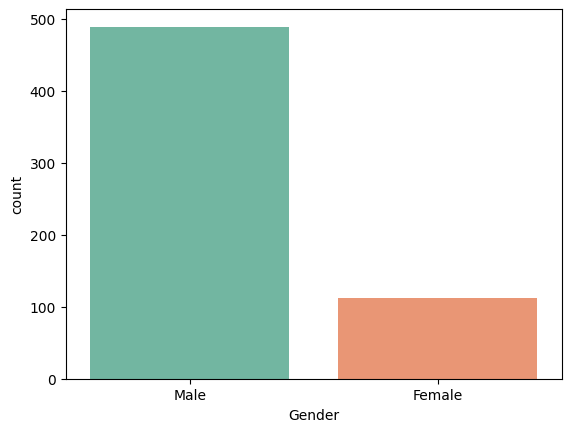

In [13]:
print("Number of people who take a loan group by gender :")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, hue = 'Gender', palette = 'Set2', legend = False)

Number of people who take a loan group by gender :
Yes    398
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

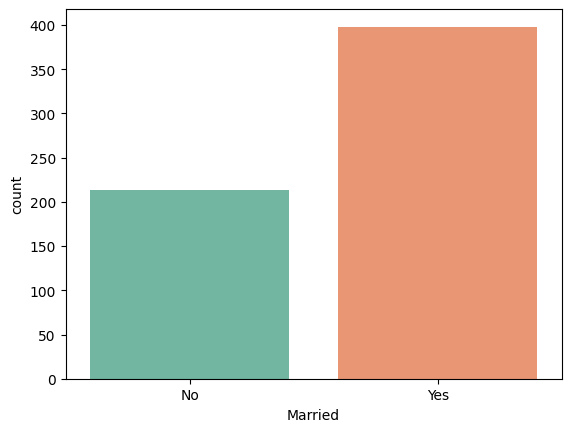

In [14]:
column = 'Married'
print("Number of people who take a loan group by gender :")
print(data[column].value_counts())
sns.countplot(x=column, data=data, hue = column, palette = 'Set2', legend = False)

Number of people who take a loan group by gender :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

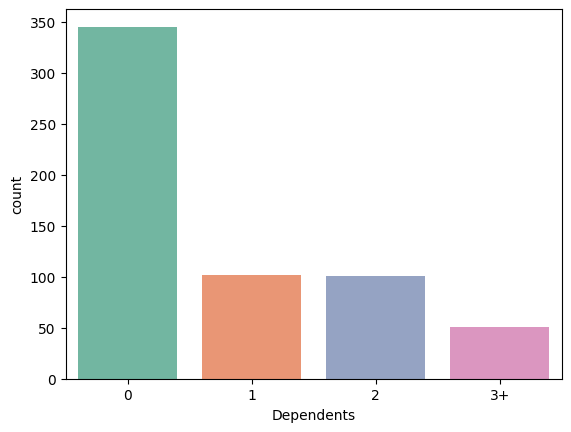

In [15]:
column = 'Dependents'
print("Number of people who take a loan group by gender :")
print(data[column].value_counts())
sns.countplot(x=column, data=data, hue = column, palette = 'Set2', legend = False)

Number of people who take a loan group by gender :
No     500
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

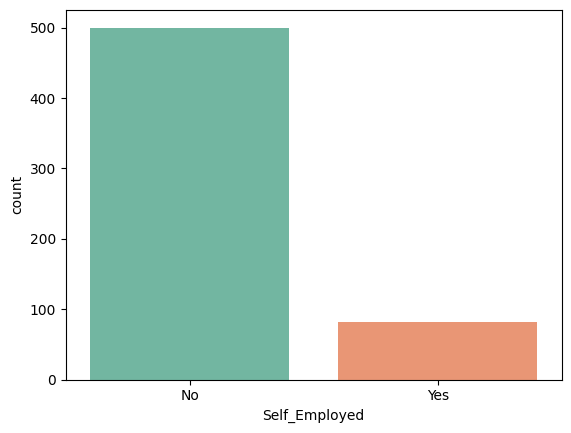

In [16]:
column = 'Self_Employed'
print("Number of people who take a loan group by gender :")
print(data[column].value_counts())
sns.countplot(x=column, data=data, hue = column, palette = 'Set2', legend = False)

Number of people who take a loan group by gender :


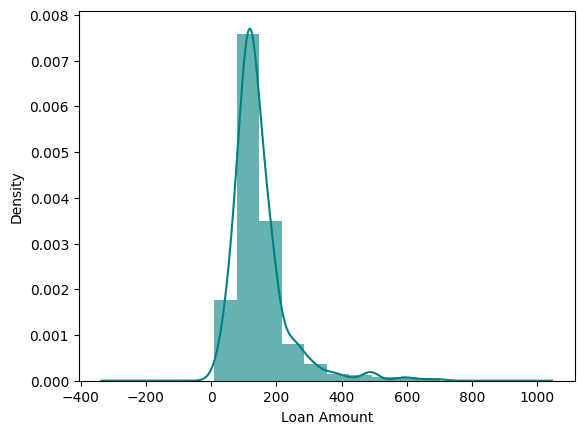

In [17]:
column = 'LoanAmount'
print("Number of people who take a loan group by gender :")
ax = data[column].hist(density=True, stacked=True, color='teal', alpha=0.6)
data[column].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

Number of people who take a loan group by gender :
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

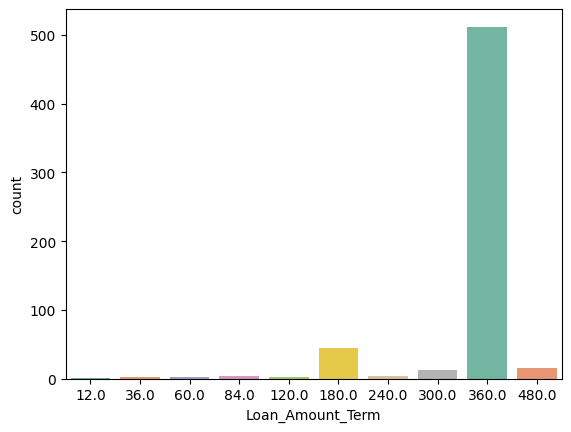

In [18]:
column = 'Loan_Amount_Term'
print("Number of people who take a loan group by gender :")
print(data[column].value_counts())
sns.countplot(x=column, data=data, hue = column, palette = 'Set2', legend = False)

Number of people who take a loan group by gender :
1.0    475
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

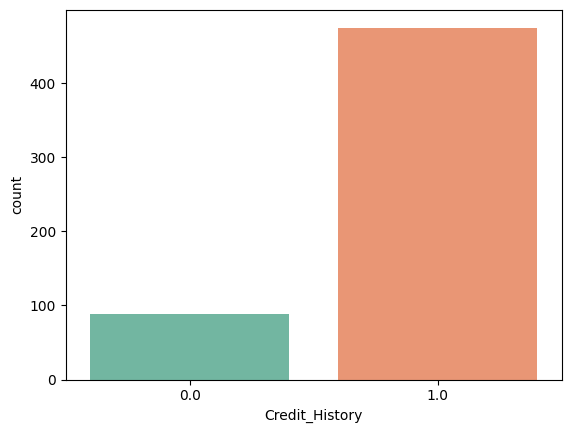

In [19]:
column = 'Credit_History'
print("Number of people who take a loan group by gender :")
print(data[column].value_counts())
sns.countplot(x=column, data=data, hue = column, palette = 'Set2', legend = False)

In [20]:
train_data = data.copy()
train_data['Gender'].fillna(train_data['Gender'].value_counts().idxmax(), inplace=True)
train_data['Married'].fillna(train_data['Married'].value_counts().idxmax(), inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].value_counts().idxmax(), inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].value_counts().idxmax(), inplace=True)
train_data["LoanAmount"].fillna(train_data["LoanAmount"].mean(skipna=True), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].value_counts().idxmax(), inplace=True)

In [21]:
#Check missing values
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [23]:
#Convert some object data type to int64
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}

train_data['Gender'] = train_data['Gender'].replace(gender_stat)
train_data['Married'] = train_data['Married'].replace(yes_no_stat)
train_data['Dependents'] = train_data['Dependents'].replace(dependents_stat)
train_data['Education'] = train_data['Education'].replace(education_stat)
train_data['Self_Employed'] = train_data['Self_Employed'].replace(yes_no_stat)
train_data['Property_Area'] = train_data['Property_Area'].replace(property_stat)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
from sklearn.model_selection import train_test_split

# Assuming 'train_data' is your DataFrame and the last column is the output
X = train_data.iloc[:, 1:-1]  # Features (all columns except the last one)
y = train_data.iloc[:, -1]   # Target variable (last column)

# Split the data into training and testing sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and y_train contain 80% of the data for training, and X_test and y_test contain 20% for testing.

In [26]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,1,1,0,1,0,6000,2250.0,265.000000,360.0,1.0,0
90,1,1,0,1,0,2958,2900.0,131.000000,360.0,1.0,0
227,1,1,2,1,0,6250,1695.0,210.000000,360.0,1.0,0
482,1,1,0,1,0,2083,3150.0,128.000000,360.0,1.0,0
464,1,0,0,1,0,4166,0.0,98.000000,360.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,0,1,1875,1875.0,97.000000,360.0,1.0,0
106,1,1,2,1,0,11417,1126.0,225.000000,360.0,1.0,1
270,0,0,0,1,0,3237,0.0,30.000000,360.0,1.0,1
435,0,1,0,1,0,10047,0.0,146.412162,240.0,1.0,0


In [28]:
y_train

83     N
90     Y
227    Y
482    Y
464    N
      ..
71     Y
106    Y
270    Y
435    Y
102    Y
Name: Loan_Status, Length: 491, dtype: object

In [29]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,1,1,0,1,0,9083,0.0,228.0,360.0,1.0,0
377,1,1,0,1,0,4310,0.0,130.0,360.0,1.0,0
163,1,1,2,1,0,4167,1447.0,158.0,360.0,1.0,2
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,2
132,1,0,0,1,0,2718,0.0,70.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
231,1,1,0,1,0,3716,0.0,42.0,180.0,1.0,2
312,0,0,0,1,0,2507,0.0,56.0,360.0,1.0,2
248,1,1,1,1,0,2882,1843.0,123.0,480.0,1.0,0
11,1,1,2,1,0,2500,1840.0,109.0,360.0,1.0,1


In [30]:
y_test

350    Y
377    Y
163    Y
609    Y
132    Y
      ..
231    Y
312    Y
248    Y
11     Y
333    Y
Name: Loan_Status, Length: 123, dtype: object

Gradient Boosting:
Training Accuracy: 0.9022
Testing Accuracy: 0.7724
---
Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.7642
---
Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.6748
---
K-Nearest Neighbor:
Training Accuracy: 0.7352
Testing Accuracy: 0.5772
---
SVM:
Training Accuracy: 0.7026
Testing Accuracy: 0.6504
---


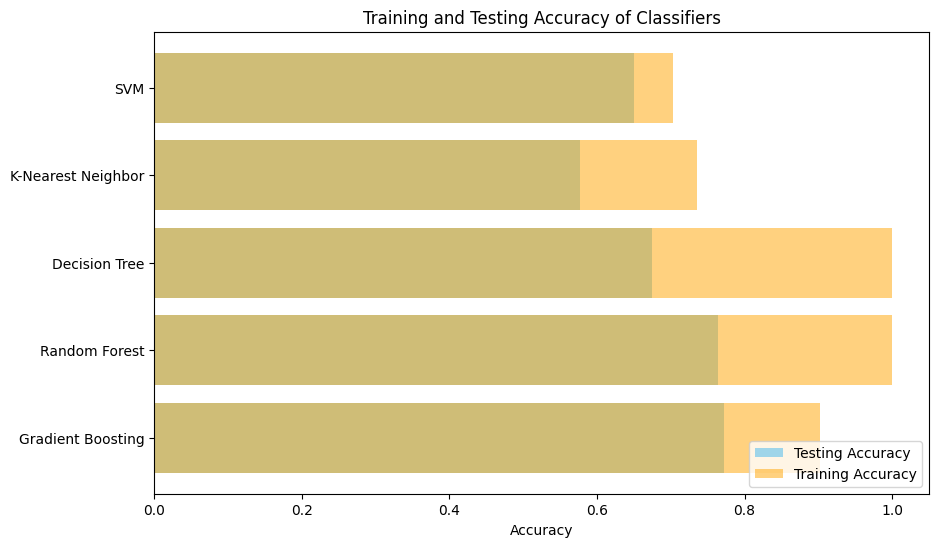

In [31]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize classifiers
classifiers = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'SVM': SVC()
}

# Lists to store training and testing accuracies
train_acc = []
test_acc = []

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on training and testing data
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)

    # Calculate accuracy on training and testing data
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Append accuracies to lists
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

    # Print results
    print(f'{clf_name}:')
    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Testing Accuracy: {test_accuracy:.4f}')
    print('---')

# Plotting
import matplotlib.pyplot as plt
classifiers_names = list(classifiers.keys())
y_pos = np.arange(len(classifiers_names))

plt.figure(figsize=(10, 6))
plt.barh(y_pos, test_acc, align='center', alpha=0.8, color='skyblue')
plt.barh(y_pos, train_acc, align='center', alpha=0.5, color='orange')
plt.yticks(y_pos, classifiers_names)
plt.xlabel('Accuracy')
plt.title('Training and Testing Accuracy of Classifiers')
plt.legend(['Testing Accuracy', 'Training Accuracy'], loc='lower right')
plt.show()

<Figure size 800x600 with 0 Axes>

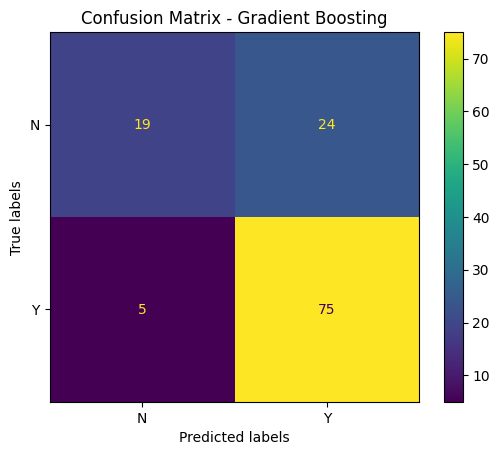

<Figure size 800x600 with 0 Axes>

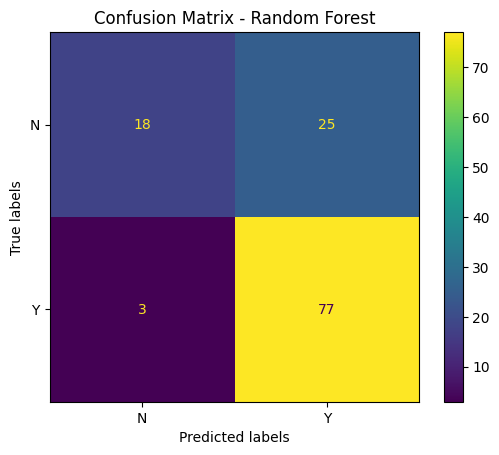

<Figure size 800x600 with 0 Axes>

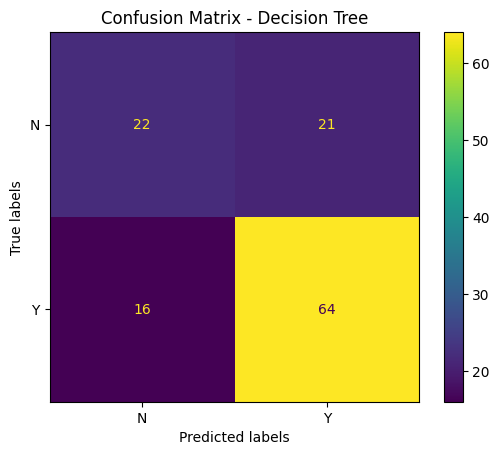

<Figure size 800x600 with 0 Axes>

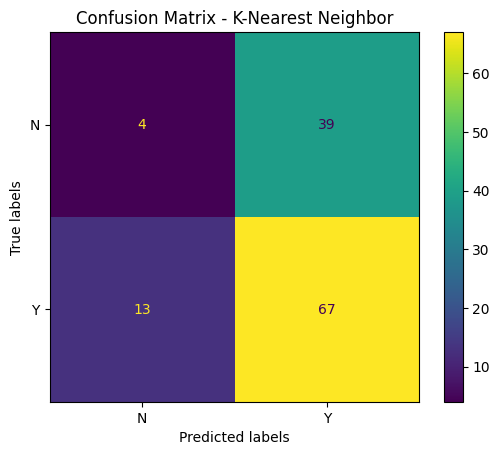

<Figure size 800x600 with 0 Axes>

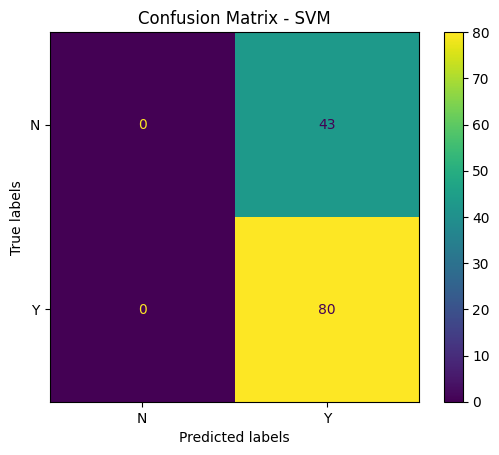

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on testing data
    test_preds = clf.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, test_preds)
    cmp = ConfusionMatrixDisplay(cm, display_labels=['N', 'Y'])

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    #sns.heatmap(cmp, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
    cmp.plot()
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.show()


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on testing data
    test_preds = clf.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, test_preds, average='binary', pos_label='Y')
    recall = recall_score(y_test, test_preds, average='binary', pos_label='Y')
    f1 = f1_score(y_test, test_preds, average='binary', pos_label='Y')

    # Print results
    print(f'{clf_name}:')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print('---')


Gradient Boosting:
Precision: 0.7576
Recall: 0.9375
F1-score: 0.8380
---
Random Forest:
Precision: 0.7500
Recall: 0.9375
F1-score: 0.8333
---
Decision Tree:
Precision: 0.7586
Recall: 0.8250
F1-score: 0.7904
---
K-Nearest Neighbor:
Precision: 0.6321
Recall: 0.8375
F1-score: 0.7204
---
SVM:
Precision: 0.6504
Recall: 1.0000
F1-score: 0.7882
---
